# Model Selection KNN



In [1]:
# load necessary libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import numpy as np
np.random.seed(1)
%matplotlib inline

## kNN: Find the best k?

We will again work with the diabetes dataset that contains patient attributes (e.g. age, glucose, ...) and information on whether the patient is diagnosed with diabetes (0 meaning "no", 1 meaning "yes"). The goal is to learn a model that predicts whether a (new) patient has diabetes given a set of patient attributes. This is a classification task and you can use the kNN classifier. The kNN classifier has a hyperparameter `k` and in order to find its optimal value for our target problem we need to do hyperparameter tuning (model selection). That will be the main goal of the tasks in this exercise.

#### Prepare the data for learning
Get the inputs X and targets y from the dataset. Always leave a poriton of the data for testing. The test dataset should not be used for model development or model selection but should be kept for the performance assessment of the final model. We split the data-set into 80% training and 20% test examples to create the training set and test set.

In [9]:
# get data
df = pd.read_csv('DiabetesDataset.csv')
# keep the patient characteristics as inputs X and the diabetes as target y
X = df.drop(columns=['Diabetes'])
y = df['Diabetes'].values

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# check out the size of the training and test datasets
print ("Training Set Size:", len(X_train))
print ("Test Set Size:", len(X_test))

Training Set Size: 691
Test Set Size: 77


### 1. Cerate a validation set
One way to select the best `k` is to use a validation set (do hyperparameter tuning using a validation set). The validation set is also called a development set. 

Obtain a validation set by splitting the previously created training set into two parts: 80% used for training and 20% used for validation.

How many samples are in the three sets now?


In [10]:
#### START YOUR CODE HERE ####
# Obtain the validation set
#split dataset into train and test data
X_training, X_validation, y_training, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
# get the sizes of the different sets
print ("Training Set Size:", len(X_training))
print ("Validation Set Size:", len(X_validation))
#### END YOUR CODE HERE ####

Training Set Size: 552
Validation Set Size: 139


### 2. Find optimal k using the validation set
Use the validation set to estimate the best k for the kNN classifier. Choose the best `k` from the values from 1 to 100 using the accuracy score. Plot the computed accuracy scores for all considered values of `k` with a line plot and draw a vertical line at the best `k`.

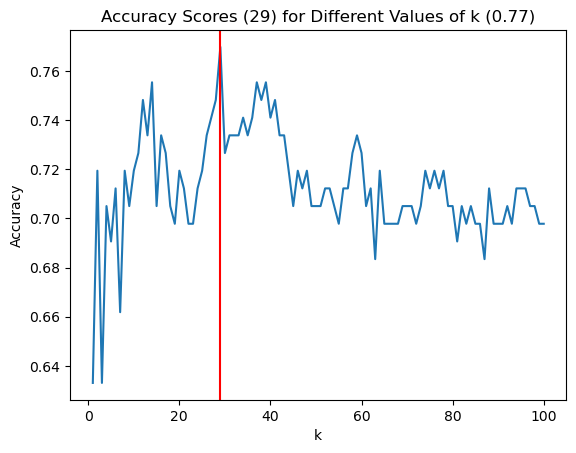

Best k: 29


In [15]:
# single crossvalidation for given K
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# list to store the scores for the different k values
scores = []
# loop from 1 to 100 to find the best k for k-NN. 
for k in range(1,101):
  #### START YOUR CODE HERE ####
  #train the kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_training, y_training)
    
  # compute the predictions on the validation set
    y_pred = knn.predict(X_validation)
    
  # compute the accuracy score on the validation set 
    acc = accuracy_score(y_validation, y_pred)
    
  # add the accuracy score to your scores list  
    scores.append(acc)
    
# find the k that yields the best accuracy score and the best score
best_k = np.argmax(scores) + 1
best_score = np.max(scores)

# plot the computed accuracy scores for all tested values of k and draw a vertical line at the k
plt.plot(range(1, 101), scores)

# Draw a vertical line at the k that yields the best accuracy score
plt.axvline(best_k, color='red')

# Set the axis labels
plt.xlabel("k")
plt.ylabel("Accuracy")

# Set the title
plt.title(f"Accuracy Scores ({best_k}) for Different Values of k ({round(best_score,3)})")

# Show the plot
plt.show()
print("Best k:", best_k)
#### END YOUR CODE HERE ####


### 3. Train a final kNN classifier
Train a final classifier using the best k you selected on the validation set and evaluate its performance (accuracy score) on the test set. Print the test accuracy score and compute and display a confusion matrix for the test set.

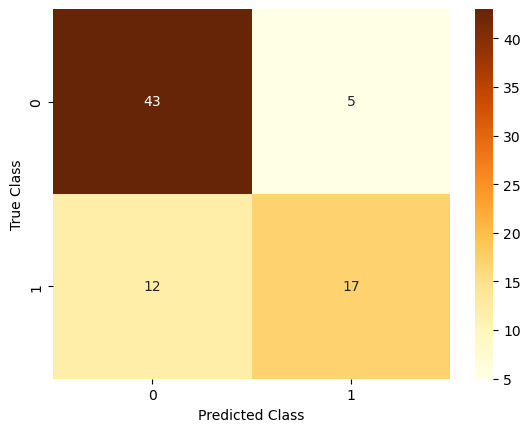

In [20]:
#### START YOUR SOLUTION HERE ####
# fit the knn classifier
knn_final = KNeighborsClassifier(n_neighbors=29).fit(X_training, y_training)
# compute predictions on the test data
y_pred_final = knn_final.predict(X_test)
# compute and print the accuracy on the test data
acc_test = accuracy_score(y_test, y_pred_final)

# compute the confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred_final)

# plot the confusion matrix for the test set using a heatmap
sns.heatmap(cm, annot=True, cmap='YlOrBr')
plt.title('Test accuracy score for k={} : {}')
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


#### END YOUR SOLUTION HERE ####

### 4. Select best k using Cross-Validation (CV)

Instead of using a validation set use the whole training data und a 10-fold cross-validation to estimate the best `k`. Choose the best `k` from the values from 1 to 100. Plot the mean CV accuracy scores for all considered values of `k`, their standard deviations and a vertical line for the best `k`. 

#### Hint: 
[Cross validation score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)

In [ ]:
# single crossvalidation for given K
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# arrays to store the mean and standard deviation of the cross validation scores for each tested value of k
mean_scores = np.array([])
scores_std =np.array([])
# loop from 1 to 100 to find the best k for kNN
for k in range(1,101):
#### START YOUR CODE HERE ####
  # create a new kNN model

  # compute the accuracy scores for each fold of a 10-fold CV

  
  # compute the average and standard deviation of the CV scores and add them to their respective arrays

# find the best k and best score

# plot all scores for all tested values of k with their standard deviations and a vertical line the depicts the best k

#### END YOUR CODE HERE ####


### 5. Train a final kNN classifier based on the CV hyperparameter tuning
Train a final classifier using the best `k` you selected in the 10-fold cross-validation and evaluate its performance (accuracy score) on the test set. Print the test accuracy score and compute and display a confusion matrix for the test set.

In [ ]:
#### START YOUR SOLUTION HERE ####
# train the final kNN classifier to the training data

# compute predictions for the test data

# compute and print the accuracy score on the test data

# compute the confusion matrix for the test set

# plot the confusion matrix for the test set using a heatmap

#### END YOUR SOLUTION HERE ####

### 6. Hyperparameter tuning (multiple parameters)
Find which hyperparameters `n_neighbors` (for the range 1 to 100), `p` (L1 or L2 norm for the distance) and `weights` (equal importance or importance based on distance) of the [KNN class](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) are the optimal ones. 

#### Hint: 
[Grid Search Cross Validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
# Grid Search - hyperparameter tuning when we have more than one parameter
from sklearn.model_selection import GridSearchCV
### START YOUR SOLUTION HERE ###
# define the grid of the three parameters to test

# train the kNN model

# print the best hyperparameters and the corresponding averaged CV accuracy score

### END YOUR SOLUTION HERE ###

### 7. Fit the model using the selected (best) hyperparameters
Train a final classifier using the selected, best hyperparaeters in the grid search CV, evaluate its performance (accuracy score) on the test set and print the accuracy score and the confusion matrix.

In [ ]:
#### START YOUR SOLUTION HERE ####
# fit a kNN classifier with the best parameters selected in the grid search CV

# compute the predictions on the test data using the trained model

# compute the test accuracy score

# compute the confusion matrix for the test set

# plot the confusion matrix for the test set using a heatmap

#### END YOUR SOLUTION HERE ####